In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import trapz
plt.style.use('seaborn-darkgrid')
import seaborn as sns

### Data File Details

|RowID	|Row number
|------|------|
|time	|Time since start of sounding (s)|
|Pscl	|-|
|T	|Temperature (K)|
|RH	|Relative humidity (%)|
|v	|v-component of wind (m/s)|
|u	|u-component of wind (m/s)|
|Height|	Height ASL (m)|
|P	|Pressure (hPa)|
|TD	|Dewpoint temperature (K)|
|MR	|Mixing ratio (g/kg)|
|DD	|Wind direction (degrees)|
|FF	|Horizontal wind speed magnitude (m/s)|
|AZ	|Azimuth position (degrees)|
|Range	|-|
|Lon	|Longitude|
|Lat	|Latitude|
|SpuKey	|-|
|UsrKey	|-|
|RadarH	|-|

In [2]:
titles=['time','temp','height','press','tempD','mr','dd','ff']
cols=[1,3,7,8,9,10,11,12]
df = pd.read_excel('Sounding23Mar2017.xlsx',names=titles,usecols=cols,header=0)
df.head()

,time,temp,height,press,tempD,mr,dd,ff
0,0,282.6,2,1016.1,277.4,5.09,88,2.1
1,2,282.6,13,1014.7,275.8,4.55,105,3.2
2,4,282.5,22,1013.6,275.5,4.46,108,3.8
3,6,282.2,33,1012.3,275.4,4.43,109,4.3
4,8,282.0,46,1010.8,275.4,4.42,110,4.7


#### Plot the temperature and dewpoint profiles vs. pressure with tropopause

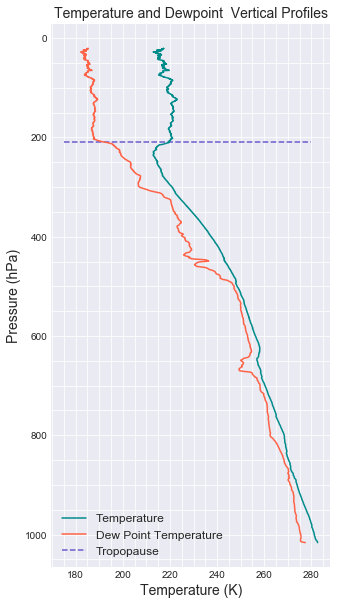

In [3]:
plt.figure(figsize=(5,10))
plt.plot(df.temp,df.press,label="Temperature",c='darkcyan')
plt.plot(df.tempD,df.press,label="Dew Point Temperature",c='tomato')
plt.hlines(210,175,280,colors='slateblue', linestyles='--', label='Tropopause')
plt.gca().invert_yaxis()
plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("Pressure (hPa)", fontsize=14)
plt.title("Temperature and Dewpoint  Vertical Profiles", fontsize=14)
plt.minorticks_on()
plt.grid(which='minor')
plt.legend(fontsize=12)
plt.savefig('Temperature and Dewpoint Vertical Profiles.png')

#### Make a plot with the wind speed profile



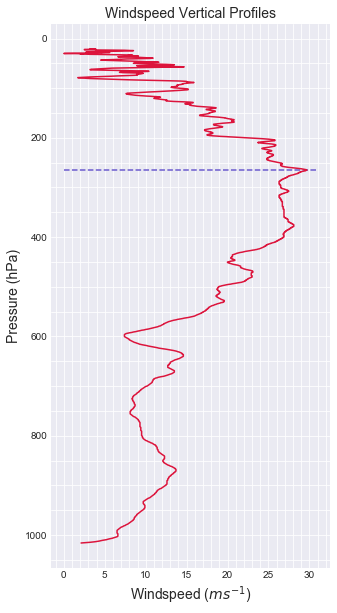

In [4]:
rslt_df = df.loc[df['ff'].argmax()] 
plt.figure(figsize=(5,10))
plt.plot(df.ff,df.press,c='crimson',label='Windspeed')
plt.hlines(rslt_df.press,0,31,colors='slateblue', linestyles='--', label='Jet Stream')
plt.gca().invert_yaxis()
plt.xlabel("Windspeed ($ms^{-1}$)", fontsize=14)
plt.ylabel("Pressure (hPa)", fontsize=14)
plt.title("Windspeed Vertical Profiles", fontsize=14)
plt.minorticks_on()
plt.grid(which='minor')
plt.savefig('Windspeed Vertical Profiles.png')

#### Make a plot with the wind direction

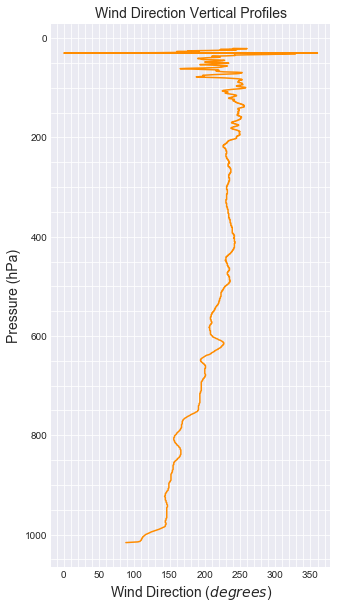

In [5]:
plt.figure(figsize=(5,10))
plt.plot(df.dd,df.press,c='darkorange')
plt.gca().invert_yaxis()
plt.xlabel("Wind Direction ($degrees$)", fontsize=14)
plt.ylabel("Pressure (hPa)", fontsize=14)
plt.title("Wind Direction Vertical Profiles", fontsize=14)
plt.minorticks_on()
plt.grid(which='minor')
plt.savefig('Wind Direction Vertical Profiles.png')

In [6]:
titles=['time','temp','height','press','tempD','mr','dd','ff']
cols=[1,3,7,8,9,10,11,12]
df = pd.read_excel('Sounding23Mar2017.xlsx',names=titles,usecols=cols,header=0)
df['ff'].argmax()

1033

In [7]:
rslt_df.press

265.1